In [16]:
data1 <- read.csv("Data_CitiBike/JC-201902-citibike-tripdata.csv")
data2 <- read.csv("Data_CitiBike/JC-201903-citibike-tripdata.csv")
data3 <- read.csv("Data_CitiBike/JC-201904-citibike-tripdata.csv")
data4 <- read.csv("Data_CitiBike/JC-201905-citibike-tripdata.csv")
data5 <- read.csv("Data_CitiBike/JC-201906-citibike-tripdata.csv")

In [38]:
data <- rbind(data1, data2, data3, data4, data5)

In [34]:
sum_missing_values <- sum(is.na(data))
sum_missing_values

[1] 0

In [49]:
average_trip_duration <- mean(data$tripduration)/60
average_trip_duration

median_trip_duration <- median(data$tripduration)/60
median_trip_duration

[1] 12.81071

[1] 5.683333

In [54]:
min_duration <- min(data$tripduration)/60
max_duration <- max(data$tripduration)/60

min_duration
max_duration

[1] 1.016667

[1] 28817

In [69]:
mean_less_than_three <- mean(data$tripduration[data$tripduration <= 3*60*60])/60
median_less_than_three <- median(data$tripduration[data$tripduration <= 3*60*60])/60

mean_less_than_three
median_less_than_three

n_skimmed_entries <- length(data$tripduration) - length(data$tripduration[data$tripduration <= 3*60*60])
n_skimmed_entries

[1] 9.223037

[1] 5.666667

[1] 427

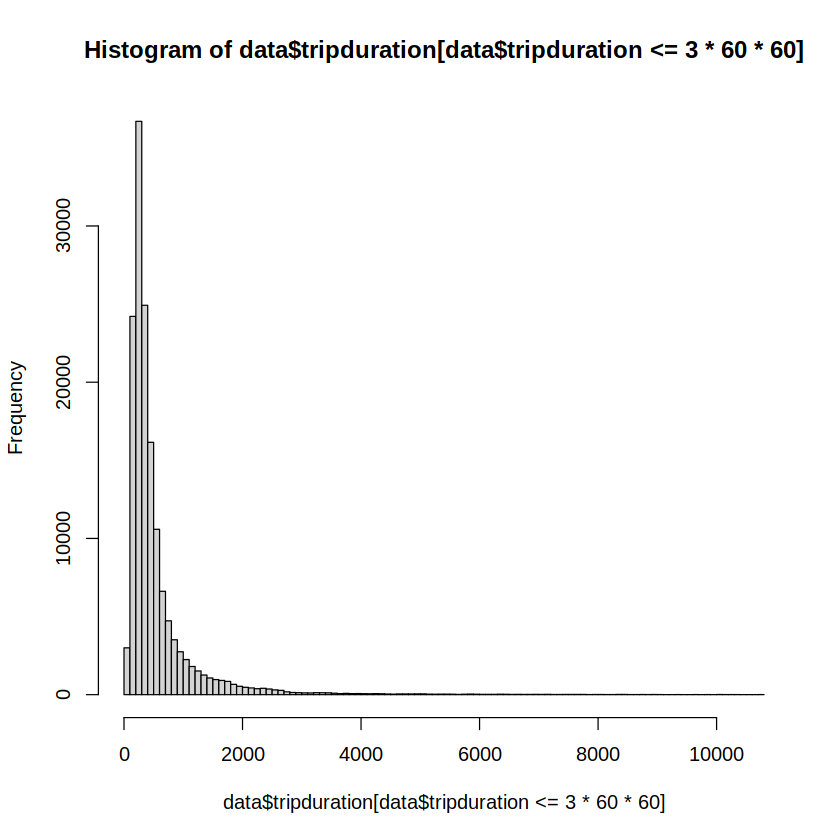

In [76]:
hist(data$tripduration[data$tripduration <= 3*60*60], breaks=100)

In [83]:
start_month <- format(as.Date(data$starttime), "%m")

for (x in start_month) {
    total_dur <- sum(data$tripduration[format(as.Date(data$starttime), "%m") == x])
}

total_dur